In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit 
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
DATA = make_classification(n_samples= 1000,n_features=2, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1)
x = DATA[0][:,0]
y1 = DATA[0][:,1]
target = DATA[1]

In [3]:
class_1 = target == 0
class_2 = target == 1

In [4]:
X = np.c_[np.ones((DATA[0].shape[0], 1)), x, y1]
X1 = X.copy()
y = target 

In [5]:
def cost_function(theta, X, y):
    cost = -1 * (1 / y.size) * (np.log(expit(X.dot(theta))).T.dot(y) + np.log(1 - expit(X.dot(theta))).T.dot(1 - y))         
    return cost

In [6]:
def gradient(theta, X, y):
    grad =(1 / y.size) * X.T.dot(expit(X.dot(theta)) - y)
    return(grad.flatten())

In [7]:
def predict(theta, X):
    p = expit(X.dot(theta.T)) >= 0.01
    return(p.astype('int'))

In [8]:
initial_theta = np.zeros(X.shape[1])
cost = cost_function(initial_theta, X, y)
grad = gradient(initial_theta, X, y)

In [9]:
res = minimize(cost_function, initial_theta, args=(X,y), 
               method='SLSQP', options={'maxiter':1000})
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), 
                       np.linspace(x2_min, x2_max))
h = expit(np.c_[np.ones((xx1.ravel().shape[0], 1)), 
                xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)

/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.4/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/lib/python3/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


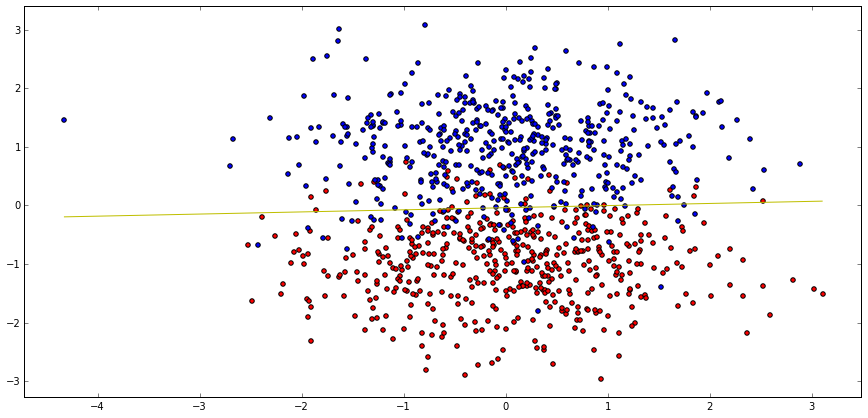

In [10]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(x[class_1], y1[class_1], c = 'r')
ax.scatter(x[class_2], y1[class_2], c = 'b')
ax.contour(xx1, xx2, h, [0.5], 
            colors='y')

# Compare with sklearn

In [11]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
regression = linear_model.LogisticRegression(penalty='l2', C=1)

In [12]:
%time
regression.fit(X, y)
a = regression.predict(X)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


In [13]:
%time
b = predict(res.x,X1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


In [14]:
a == b

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True,